In [42]:
from keras.datasets import imdb

In [43]:
(train_data,train_lable),(test_data,test_lable) = imdb.load_data(num_words=10000)#num_words = 10000 仅保留训练数据前10000个最常出现的单词

In [44]:
max([max(squence) for squence in train_data])

9999

In [45]:
word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key,value) in word_index.items()])
decode_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

decode_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [46]:
import numpy as np
#共有10000个常用词 此函数是将data转化成 包含有 第几个词的位置上设为1
def vectorize_sequences(sequences, dimension=10000):
   
    results = np.zeros((len(sequences),dimension))
    for i, sequence in enumerate(sequences):
        results[i,sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)


In [48]:

y_train = np.asarray(train_lable).astype('float32')
y_test = np.asarray(test_lable).astype('float32')

In [49]:
from keras import models
from keras import layers
#激活函数为relu函数 
model = models.Sequential()
#隐含层第一层 16个单元
model.add(layers.Dense(16, activation="relu", input_shape=(10000,)))
#隐含层第二层，16个单元
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

In [50]:
#选择rmsprop优化器 和 binary——crossentropy损失函数
# model.compile(optimizer='rmsprop',
#              loss='binary_crossentropy',
#              metrics=['accuracy'])


#配置优化器

from keras import optimizers
# model.compile(optimizer=optimizers.RMSprop(lr=0.001),
#              loss='binary_crossentropy',
#              metrics=['accuracy'])

#使用自定义的损失和指标
from keras import losses
from keras import metrics

model.compile(optimizer=optimizers.RMSprop(lr=0.01),
             loss=losses.binary_crossentropy,
             metrics=[metrics.binary_accuracy])



In [51]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['acc'])
history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs=20,
                   batch_size=512,
                   validation_data =(x_val,y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 6s 370us/step - loss: 0.5084 - acc: 0.7813 - val_loss: 0.3798 - val_acc: 0.8684
Epoch 2/20
15000/15000 [==============================] - 2s 159us/step - loss: 0.3005 - acc: 0.9045 - val_loss: 0.3004 - val_acc: 0.8896
Epoch 3/20
15000/15000 [==============================] - 2s 114us/step - loss: 0.2180 - acc: 0.9286 - val_loss: 0.3085 - val_acc: 0.8711
Epoch 4/20
15000/15000 [==============================] - 2s 114us/step - loss: 0.1751 - acc: 0.9438 - val_loss: 0.2840 - val_acc: 0.8830
Epoch 5/20
15000/15000 [==============================] - 3s 171us/step - loss: 0.1427 - acc: 0.9543 - val_loss: 0.2847 - val_acc: 0.8864
Epoch 6/20
15000/15000 [==============================] - 2s 124us/step - loss: 0.1150 - acc: 0.9651 - val_loss: 0.3153 - val_acc: 0.8770
Epoch 7/20
15000/15000 [==============================] - 2s 109us/step - loss: 0.0980 - acc: 0.9706 - val_loss: 0.3127 - 

In [52]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

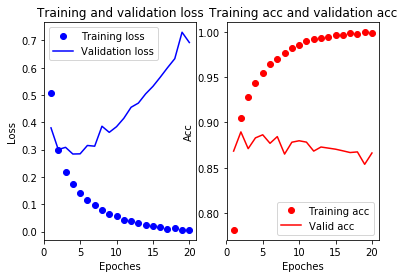

In [56]:
import matplotlib.pyplot as plt

loss_valus = history_dict['loss']
val_loss_values = history_dict['val_loss']

acc = history_dict['acc']
val_acc = history_dict['val_acc']

epoches = range(1, len(loss_valus)+1)

plt.subplot(1,2,1)
plt.plot(epoches, loss_valus, 'bo', label="Training loss")
plt.plot(epoches, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epoches')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(epoches, acc,'ro',label='Training acc')
plt.plot(epoches,val_acc,'r',label='Valid acc')
plt.title('Training acc and validation acc')
plt.xlabel('Epoches')
plt.ylabel('Acc')
plt.legend()

plt.show()

#差不多在第四次的时候最佳 验证误差在4次之后变大 过拟合了

In [60]:
#完整训练模型 只训练4次
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,))) 
model.add(layers.Dense(16, activation='relu')) 
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy',
metrics=['accuracy'])
model.fit(x_train, y_train, epochs=4, batch_size=512) 
results = model.evaluate(x_test, y_test)

Epoch 1/4
25000/25000 [==============================] - 7s 272us/step - loss: 0.4749 - acc: 0.8217
Epoch 2/4
25000/25000 [==============================] - 3s 135us/step - loss: 0.2658 - acc: 0.9097
Epoch 3/4
25000/25000 [==============================] - 3s 102us/step - loss: 0.1983 - acc: 0.9301
Epoch 4/4
25000/25000 [==============================] - 5s 182us/step
